Exercice 1: Jeux de la vie 

Question 4: Une fonction qui permet de calculer le nombre de voisins de chaque cellule.

In [111]:
def calcul_nb_voisins(Z):
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
            + Z[x-1][y] + 0 +Z[x+1][y] \
            + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [112]:
Z = [[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]

In [113]:
calcul_nb_voisins(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

Les chiffres dans le tableau indiquent le nombre de voisins des cellules.
la prémiere ligne n'a que des zéro donc nous avons que des cellules vites.
les cellules avec 3 voisins sont soit des cellules vites qui vont naitre à l'étape suivante soit 
des cellules qui etaient vivante et qui vont le rester.
Toutes les cellules avec un seul voisin vont mourir à l'étape suivante.
Ceux vivants avec deux ou trois voisins vont continuer de vivre.

Question5:Une fonction qui permet de calculer les nombres d'itérations du jeu.

In [114]:
def iteration_jeu(Z):
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

In [115]:
iteration_jeu(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

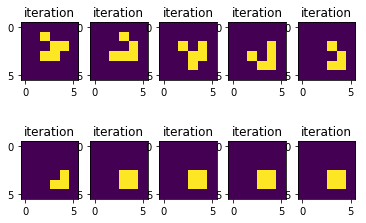

In [159]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
Z = [[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]
#print(Z)
liste=list()
#def iter(n,Z):
for i in range(10):
    liste.append(iteration_jeu(Z))
    plt.subplot(2,5,i+1)
    plt.title('iteration')
    #plt.plot(liste[i])
    plt.imshow(liste[i])
    #return( plt.imshow(liste[i]))
    #plt.title('iteration')
#print(liste)
#plt.subplot(111)
#plt.imshow(Z)
#iter(3,Z)

Entre l'tération 0 et 4 nous remarquons que le nombre de cellule vivantes restent constants si il y'a une cellule qui meurt à l'étape suivante en meme temps il y'a une cellule qui nait.
Aprés l'itération nous voyons la formation d'un carré qui est constitué de 4 cellules vivantes dont chacune a 3 voisins,
donc les cellules continue de vivre. On n'est dans un état d'équilibre constant.

Commentaire:Ici on n'a programmé une fonction qui effectue le travail précedent dont le choix du nombre d'itérations
est pour l'utilisateur.

In [160]:
def iter(n,Z):
    liste=list()
    for i in range(n):
        liste.append(iteration_jeu(Z))
        plt.subplot(2,n,i+1)
        #plt.title('iteration')
        plt.imshow(liste[i])
   
    return(plt.imshow(liste[i]))
    #plt.title('iteration')
#print(liste)
#plt.subplot(111)
#plt.imshow(Z)
#iter(4,Z)

Exercice 2:Régression logistique

Importation des données.

In [230]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1, cache=True)
X = mnist.data.astype('float64')
y = mnist.target


Question 2: Transformation de X et y pour ne garder que les nombres 3 et 7.

In [234]:
import numpy as np
masque_3=np.array(X == 3) 
masque_7=np.array(X == 7)
X_select=np.concatenate((X[masque_3],X[masque_7]))
print(X_select)

[3. 3. 3. ... 7. 7. 7.]


Question3: Application de la régression sur les données.
On decoupe nos données importé en deux.
Une partie pour l'apprentissage pour obtenir notre modéle et une partie test pour tester la performance du modéle.

In [118]:
X_app=X[1:50000]
X_test=X[51000:70000]
y_app=y[1:50000]
y_test=y[51000:70000]

In [107]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs',fit_intercept=False)
logisticRegr.fit(X_app,y_app)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [119]:
X_app=X[1:50000]
X_test=X[51000:70000]
y_app=y[1:50000]
y_test=y[51000:70000]

In [120]:
predictions = logisticRegr.predict(X_test)

In [121]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1822    0    6    4    2    3   15    5   11    3]
 [   0 2051    8    3    0    5    4    1   19    1]
 [  11   25 1718   34   17    9   21   22   68    4]
 [   9    2   35 1748    5   44    8   15   52   17]
 [   3   10    7    5 1748    2   13    5   19   64]
 [  21    6   11   71   15 1454   46   11   61   20]
 [  11    5   12    2    9   21 1750    1   10    0]
 [   7   10   27   15   11    2    1 1870    7   62]
 [  12   31   17   37   16   52   14   23 1644   30]
 [  10   11    4   23   54    2    1   56   30 1681]]


In [122]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9203157894736842


Le score sur les données test est trés bonne notre modéle prédit bien.

Question6: Le paramétre alpha permet de pixeliser l'image plus la valeur de alpha est grande et plus est bonne.

Question7: Réalisation d'une analyse en composante principale.

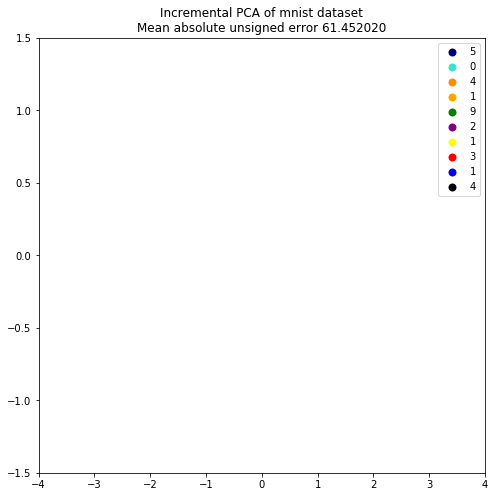

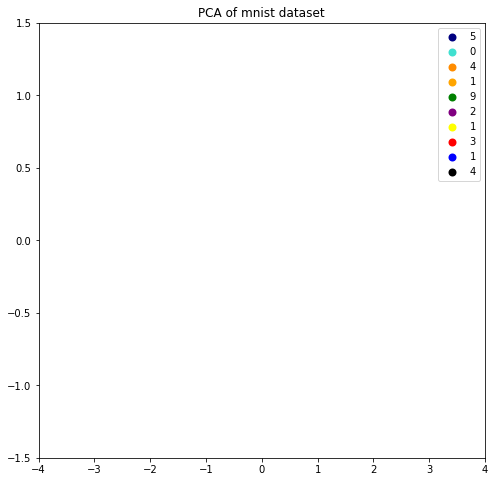

In [123]:
from sklearn.decomposition import PCA, IncrementalPCA
n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['navy', 'turquoise', 'darkorange','orange','green','purple','yellow','red',"blue","black"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0,1,2,3,4,5,6,7,8,9],y):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of mnist dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of mnist dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()